<a href="https://colab.research.google.com/github/jjoy896/jjoy6__64061/blob/main/Assignment_1/jjoy6_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the IMDB dataset

In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)






# Set the seed for Python's random number generator
os.environ['PYTHONHASHSEED'] = str(123)
random.seed(123)

# Set the seed for NumPy
np.random.seed(123)

# Set the seed for TensorFlow
tf.random.set_seed(123)

# Enable deterministic operations (optional, but recommended for full reproducibility)
tf.config.experimental.enable_op_determinism()

Multi-hot encoding of data and labels

In [2]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Validation Set

In [3]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Building example book/reference model

In [4]:

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Compiling the example book/reference model

In [5]:
model.compile(optimizer="rmsprop",loss="binary_crossentropy", metrics=["accuracy"])

Training Model

In [6]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - accuracy: 0.6893 - loss: 0.6022 - val_accuracy: 0.8597 - val_loss: 0.3888
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8848 - loss: 0.3386 - val_accuracy: 0.8693 - val_loss: 0.3305
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9186 - loss: 0.2448 - val_accuracy: 0.8834 - val_loss: 0.2921
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9332 - loss: 0.2016 - val_accuracy: 0.8862 - val_loss: 0.2773
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9479 - loss: 0.1590 - val_accuracy: 0.8825 - val_loss: 0.2973
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9618 - loss: 0.1313 - val_accuracy: 0.8853 - val_loss: 0.2938
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9649 - loss: 0.1148 - val_accuracy: 0.8849 - val_loss: 0.2991
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9714 - loss: 0.0987 - val_accuracy: 0.8828 - 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting taining and Validation loss

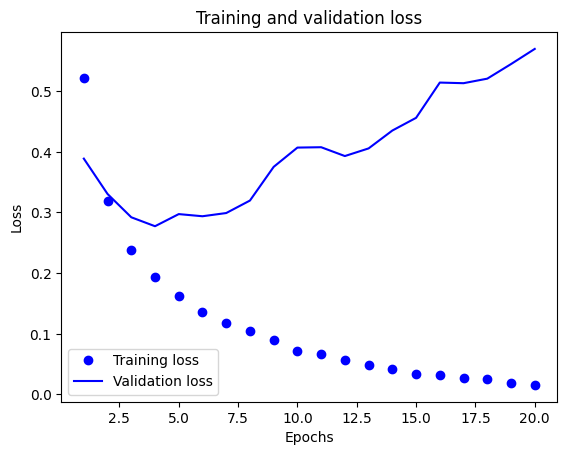

In [7]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting training and Validation acccuracy

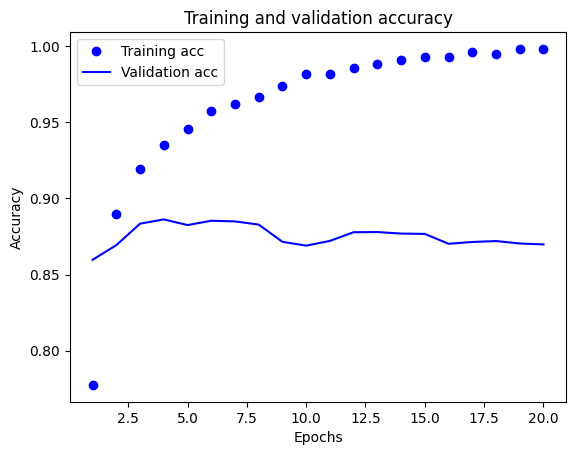

In [8]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining the model with peak epochs used

In [26]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)
results_val = model.evaluate(x_val, y_val)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9899 - loss: 0.0290
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9977 - loss: 0.0129
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9979 - loss: 0.0101
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9987 - loss: 0.0071
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8553 - loss: 0.7468
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9979 - loss: 0.0083


Results

In [27]:
results_test
#results
results_val

[0.00837875809520483, 0.9979000091552734]

Using model to predict

In [11]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.03107858],
       [0.999998  ],
       [0.21248072],
       ...,
       [0.06278208],
       [0.02187583],
       [0.94533813]], dtype=float32)

Model with 1 layer and 1 end layer

In [12]:

model_1L = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_3L = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_8U = keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_32U = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_64U = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_mse = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Compiling Model with 1 layer

In [13]:
model_1L.compile(optimizer="rmsprop",loss="binary_crossentropy", metrics=["accuracy"])

Training Model with 1 layer

In [14]:
history = model_1L.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.7238 - loss: 0.5766 - val_accuracy: 0.8380 - val_loss: 0.4197
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8915 - loss: 0.3474 - val_accuracy: 0.8786 - val_loss: 0.3294
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9169 - loss: 0.2699 - val_accuracy: 0.8873 - val_loss: 0.2958
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9315 - loss: 0.2185 - val_accuracy: 0.8878 - val_loss: 0.2820
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9424 - loss: 0.1895 - val_accuracy: 0.8887 - val_loss: 0.2792
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9487 - loss: 0.1704 - val_accuracy: 0.8861 - val_loss: 0.2764
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9539 - loss: 0.1509 - val_accuracy: 0.8773 - val_loss: 0.3057
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9640 - loss: 0.1348 - val_accuracy: 0.8835 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting Validation and Loss for model with 1 layer

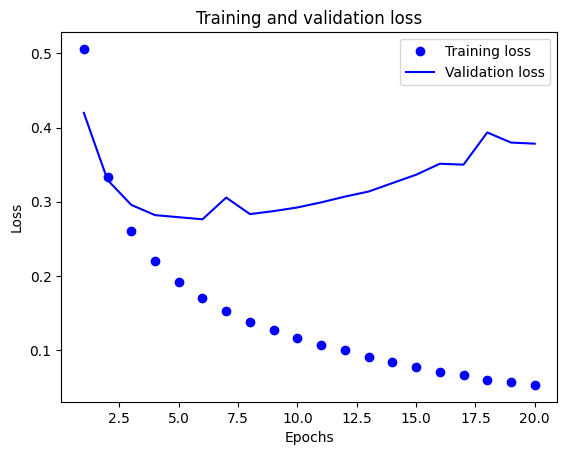

In [15]:
plt.clf()
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Training and Validation Accuracy

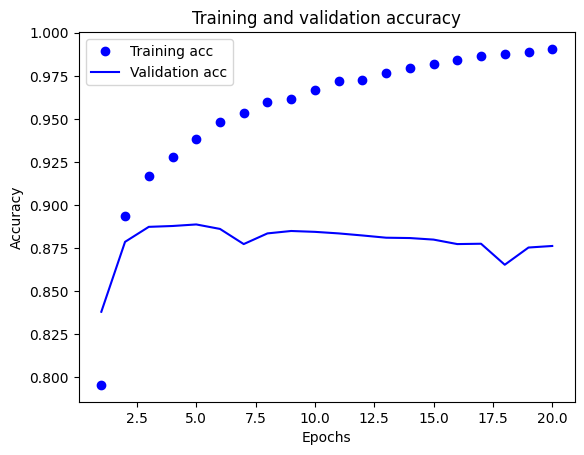

In [16]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining the model with 1 layer with peak epochs used

In [21]:
model_1L.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_1L.fit(x_train, y_train, epochs=6, batch_size=512)
results_test = model.evaluate(x_test, y_test)
results_val = model.evaluate(x_val, y_val)

Epoch 1/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9449 - loss: 0.1816
Epoch 2/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9541 - loss: 0.1399
Epoch 3/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9614 - loss: 0.1211
Epoch 4/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9656 - loss: 0.1116
Epoch 5/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9694 - loss: 0.1010
Epoch 6/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9718 - loss: 0.0939
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8576 - loss: 0.6217
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9941 - loss: 0.0243


Results against test data

In [29]:
results_test

[0.7418868541717529, 0.8561599850654602]

Results against Validation Data

In [28]:
results_val

[0.00837875809520483, 0.9979000091552734]

Summary of experiments

New Section